In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt

In [4]:
Y = np.array([1,3.5,4,8,12])
Y_hat = np.array([1,3,5,7,9])

print('error', (Y_hat-Y))

squared_error= (Y_hat - Y)**2

print(squared_error)
print(np.sum(squared_error))

error [ 0.  -0.5  1.  -1.  -3. ]
[0.   0.25 1.   1.   9.  ]
11.25


No handles with labels found to put in legend.


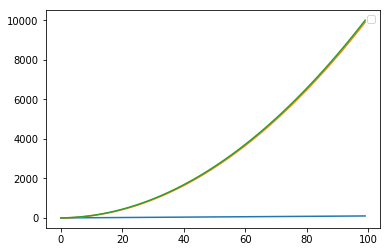

In [7]:
X1 = np.arange(100)
X2 = np.array([i **2 for i in range(100)]) + X1

Y = X1 + X2

plt.plot(X1)
plt.plot(X2)
plt.plot(Y)
plt.legend()

In [15]:
np.set_printoptions(suppress=True)
X = sm.add_constant(np.column_stack((X1, X2)))

results = regression.linear_model.OLS(Y, X).fit()
results.params

array([0., 1., 1.])

In [16]:
import pandas_datareader as pdr
from datetime import datetime

In [26]:
asset1 = pdr.data.DataReader('GS', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
asset2 = pdr.data.DataReader('C', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
benchmark = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]

slr = regression.linear_model.OLS(asset1, sm.add_constant(asset2)).fit()
slr.params

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const       -31.133981
Adj Close     4.077826
dtype: float64

In [30]:
mlr = regression.linear_model.OLS(asset1, sm.add_constant(np.column_stack((asset2, benchmark)))).fit()

prediction = mlr.params[0] + asset2 * mlr.params[1] + benchmark * mlr.params[2]

prediction.name='prediction'

mlr.params

const   -72.800316
x1        3.046973
x2        0.516014
dtype: float64

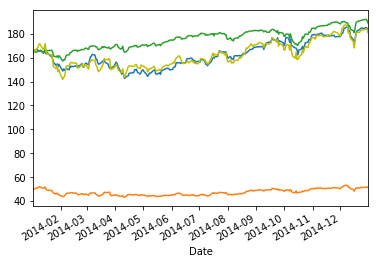

In [31]:
asset1.plot()
asset2.plot()
benchmark.plot()
prediction.plot(color='y')

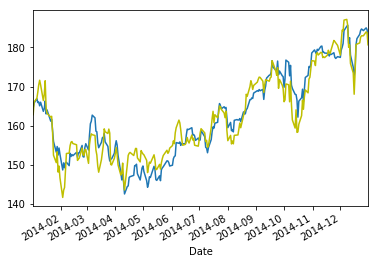

In [32]:
asset1.plot()
prediction.plot(color='y')

In [33]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1311.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):          6.11e-133
Time:                        20:49:34   Log-Likelihood:                -657.32
No. Observations:                 252   AIC:                             1321.
Df Residuals:                     249   BIC:                             1331.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -72.8003      4.765    -15.278      0.000     -82.185     -63.416
x1             3.0470      0.106     28.779      0.000       2.838       3.256
x2             0.5160      0.032     15.922      0.000       0.452       0.580
==============================================================================
Omnibus:                        5.672   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                3.532
Skew:                           0.090   Prob(JB):                        0.171
Kurtosis:                       2.449   Cond. No.                     4.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

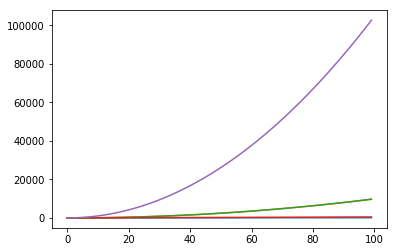

In [37]:
X1 = np.arange(100)
X2 = [i**2 for i in range(100)] - X1
X3 = [np.log(i) for i in range(1,101)] + X2
X4 = 5 * X1
Y = 2 * X1 + 0.5 * X2 + 10 * X3 + X4

plt.plot(X1)
plt.plot(X2)
plt.plot(X3)
plt.plot(X4)
plt.plot(Y)

In [38]:
results = regression.linear_model.OLS(Y, sm.add_constant(np.column_stack((X1,X2,X3,X4)))).fit()

print(results.params)

[-0.          0.26923077  0.5        10.          1.34615385]


In [39]:
data = pd.DataFrame(np.column_stack((X1,X2,X3,X4)), columns=['x1','x2','x3','x4'])
response = pd.Series(Y, name = 'y')

In [42]:
#copied and pasted

def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
           
            tmp = pd.concat([selected, data[element]], axis=1)
            print('regressing Y and ', tmp.columns)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model

In [43]:
result = forward_aic(Y, data)
result.summary()

regressing Y and  Index(['Intercept', 'x1'], dtype='object')
regressing Y and  Index(['Intercept', 'x2'], dtype='object')
regressing Y and  Index(['Intercept', 'x3'], dtype='object')
regressing Y and  Index(['Intercept', 'x4'], dtype='object')
regressing Y and  Index(['Intercept', 'x3', 'x1'], dtype='object')
regressing Y and  Index(['Intercept', 'x3', 'x2'], dtype='object')
regressing Y and  Index(['Intercept', 'x3', 'x4'], dtype='object')
regressing Y and  Index(['Intercept', 'x3', 'x1', 'x2'], dtype='object')
regressing Y and  Index(['Intercept', 'x3', 'x1', 'x4'], dtype='object')
regressing Y and  Index(['Intercept', 'x3', 'x1', 'x2', 'x4'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.402e+25
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:16:30   Log-Likelihood:                 1572.9
No. Observations:                 100   AIC:                            -3138.
Df Residuals:                      96   BIC:                            -3127.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.048e-11   2.52e-08      0.002      0.998   -4.99e-08       5e-08
x3            10.0000   1.52e-08   6.57e+08      0.000      10.000      10.000
x1             7.0000   1.21e-09   5.79e+09      0.000       7.000       7.000
x2             0.5000   1.52e-08   3.29e+07      0.000       0.500       0.500
==============================================================================
Omnibus:                       14.037   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.005
Skew:                           0.649   Prob(JB):                      0.00672
Kurtosis:                       2.154   Cond. No.                     5.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""